Feature engineering and feature selection is an iterative process that starts with engineering new features, training a model, and then testing the model predictions against the target labels. The goal is to determine which features improve the model’s prediction accuracy. You repeat this process, along with hyperparameter tuning, until you are satisfied with the model’s accuracy. 

# Load Lib 

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score,recall_score
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.metrics import mean_squared_error,classification_report,f1_score
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

#import tensorflow as tf 
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
#import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
set_config(display='diagram')
warnings.filterwarnings('ignore')


# Load the data

In [2]:
%%time 
train = pd.read_csv('../input/GiveMeSomeCredit/cs-training.csv')
test = pd.read_csv('../input/GiveMeSomeCredit/cs-test.csv')
train.head(3)

CPU times: user 272 ms, sys: 69.4 ms, total: 341 ms
Wall time: 516 ms


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


# 1-Preprocessing

## Convert Dtypes :

In [3]:
# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))
# Convert Dtypes :
test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
test[test.select_dtypes(['object','category']).columns] = test.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

## Reduce Memory

In [4]:
# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
train= reduce_mem_usage(train)
test= reduce_mem_usage(test)

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%
Memory usage of dataframe is 9.29 MB
Memory usage after optimization is: 2.90 MB
Decreased by 68.7%


## X and Y

In [5]:
# Cardinality : 
# - RevolvingUtilizationOfUnsecuredLines :125728, high Outlier
# - DebtRatio :114194 , high Outlier 
# deal with outlier + bin 
PERCENTAGE = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]
# MonthlyIncome:13594 , high outlier +bin 
REAL= ["MonthlyIncome"]
# Can be considred as cat 
NUMERIC_DISCRET_low = ["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
Late_Pay_Cols = ['NumberOfTime30-59DaysPastDueNotWorse',
                 'NumberOfTimes90DaysLate',
                 'NumberOfTime60-89DaysPastDueNotWorse']
TARGET = ["SeriousDlqin2yrs"]

#also change the type for TARGET to categorical
#df[TARGET] = df[TARGET].astype('category')

In [6]:
y = train['SeriousDlqin2yrs']

## Imput before Descritaziation : 

### IterativeImputer


In [7]:
%%time 
param =  {   "verbosity": 0,
            #"objective": "binary:logistic",
            #"eval_metric": "auc",
            'random_state': 42,
            # regression
            'objective':'reg:squarederror', 
             'eval_metric': 'mae',
            #early_stopping_rounds=100 ,
            #'gpu_id':0, 
            #'predictor':"gpu_predictor",
            # use exact for small dataset.
            #"tree_method": "exact",
            # big data :
            # 'tree_method': 'gpu_hist',
            # defines booster, gblinear for linear functions.
             'booster': 'gbtree', 
            'lambda': 8.544792472633987e-07,
            'alpha': 0.31141671752487043,
            'subsample': 0.8779467596981366, 
            'colsample_bytree': 0.9759532762677546,
            'learning_rate': 0.008686087328805853, 
            'n_estimators': 6988,
            'max_depth': 9,
            'min_child_weight': 2, 
            'eta': 3.7603213457541647e-06,
            'gamma': 2.1478058456847449e-07,
            'grow_policy': 'lossguide'}
                

#model_xgb = XGBRegressor(
       #objective="mae",
 #   **xgb_params2)

numeric_transformer1 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
numeric_transformer2 = Pipeline(
                            steps=[
                            #('imputer', SimpleImputer(strategy='median'
                             #                         ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )

pipe_xgbr1 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer1),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )
pipe_xgbr2 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer2),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )

#imputer=IterativeImputer(estimator=XGBRegressor(
#                      #objective="mae",
 #                     **param),max_iter=2,
  #                       add_indicator=True,
   #                      random_state=42)
#train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
#test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
#imputer.fit(train)
#train = imputer.transform(train)
#test = imputer.transform(test)
#features=['RevolvingUtilizationOfUnsecuredLines', 'age',
#      'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
 #      'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
 #     'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
 #     'NumberOfDependents']
#train=pd.DataFrame(train,columns=features)
#test=pd.DataFrame(test,columns=features)
#train= reduce_mem_usage(train)
#test= reduce_mem_usage(test)

CPU times: user 324 µs, sys: 39 µs, total: 363 µs
Wall time: 369 µs


### Rgression Imputer 

In [8]:
%%time 
train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
train_final= pd.concat( [train, test], axis=0) 
#testdf_income= train_final[train_final['MonthlyIncome'].isnull()==True]
traindf_income = train_final[train_final['MonthlyIncome'].isnull()==False]
y_income = traindf_income['MonthlyIncome']
X_income=traindf_income.drop(["MonthlyIncome"],axis=1)
pipe_xgbr1.fit(X_income, y_income)
train_income_missing=train[train['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
test_income_missing=test[test['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
train_predicted = pipe_xgbr1.predict(train_income_missing)
test_predicted = pipe_xgbr1.predict(test_income_missing)
train.loc[(train.MonthlyIncome.isnull()), 'MonthlyIncome'] = train_predicted
test.loc[(test.MonthlyIncome.isnull()), 'MonthlyIncome'] = test_predicted

CPU times: user 1h 17min 15s, sys: 7.77 s, total: 1h 17min 22s
Wall time: 19min 51s


In [9]:
%%time 
traindf_NumberOfDependents = train_final[train_final['NumberOfDependents'].isnull()==False]
y_NumberOfDependents = traindf_NumberOfDependents['NumberOfDependents']
X_NumberOfDependents=traindf_NumberOfDependents.drop(["NumberOfDependents"],axis=1)
pipe_xgbr2.fit(X_NumberOfDependents, y_NumberOfDependents)
train_NumberOfDependents_missing=train[train['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
test_NumberOfDependents_missing=test[test['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
train_predicted = pipe_xgbr2.predict(train_NumberOfDependents_missing)
test_predicted = pipe_xgbr2.predict(test_NumberOfDependents_missing)
train.loc[(train.NumberOfDependents.isnull()), 'NumberOfDependents'] = train_predicted
test.loc[(test.NumberOfDependents.isnull()), 'NumberOfDependents'] = test_predicted

CPU times: user 1h 31min, sys: 6.46 s, total: 1h 31min 7s
Wall time: 23min 19s


## Features Engineer
### Add Bin 
It's always good to bin data when we have lot of outlier and skweness 

In [10]:
# Add bin data 
# initializing append_str
append_str = 'cat_'
# Append suffix / prefix to strings in list
num_features1=["RevolvingUtilizationOfUnsecuredLines", "DebtRatio","MonthlyIncome"]
num_features2=["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
cat_features1 = [append_str + sub for sub in num_features1]
cat_features2 = [append_str + sub for sub in num_features2]

# create the discretizer object with strategy quantile and 1000 bins
discretizer1 = KBinsDiscretizer(n_bins=40, encode='ordinal',strategy='quantile')
discretizer2 = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile')

pipeline1 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer1)
    ])
# fit the discretizer to the train set
pipeline1.fit(train.loc[:,num_features1])
# apply the discretisation
train_cat1 = pipeline1.transform(train.loc[:,num_features1])
test_cat1 = pipeline1.transform(test.loc[:,num_features1])
train_df1=pd.DataFrame(train_cat1,columns=cat_features1).astype('category')
test_df1=pd.DataFrame(test_cat1,columns=cat_features1).astype('category')
train_final1= pd.concat( [train.loc[:,num_features1], train_df1], axis=1) 
test_final1= pd.concat( [test.loc[:,num_features1], test_df1], axis=1) 

pipeline2 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer2)
    ])
# fit the discretizer to the train set
pipeline2.fit(train.loc[:,num_features2])
# apply the discretisation
train_cat2 = pipeline2.transform(train.loc[:,num_features2])
test_cat2 = pipeline2.transform(test.loc[:,num_features2])
train_df2=pd.DataFrame(train_cat2,columns=cat_features2).astype('category')
test_df2=pd.DataFrame(test_cat2,columns=cat_features2).astype('category')
train_final2= pd.concat( [train.loc[:,num_features2], train_df2], axis=1) 
test_final2= pd.concat( [test.loc[:,num_features2], test_df2], axis=1) 

In [11]:
train_final= pd.concat( [train_final1, train_final2], axis=1) 
test_final= pd.concat( [test_final1, test_final2], axis=1) 

## Final X and y

In [12]:
# Pour le train test
target= "SeriousDlqin2yrs"
X = train_final# axis=1
X_test_final =test_final# axis=1

In [13]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines      101503 non-null  float16 
 1   DebtRatio                                 101503 non-null  float32 
 2   MonthlyIncome                             101503 non-null  float32 
 3   cat_RevolvingUtilizationOfUnsecuredLines  101503 non-null  category
 4   cat_DebtRatio                             101503 non-null  category
 5   cat_MonthlyIncome                         101503 non-null  category
 6   NumberOfDependents                        101503 non-null  float16 
 7   NumberOfTime60-89DaysPastDueNotWorse      101503 non-null  int8    
 8   NumberRealEstateLoansOrLines              101503 non-null  int8    
 9   NumberOfTimes90DaysLate                   101503 non-null  int8    
 10  NumberOf

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines      150000 non-null  float16 
 1   DebtRatio                                 150000 non-null  float32 
 2   MonthlyIncome                             150000 non-null  float32 
 3   cat_RevolvingUtilizationOfUnsecuredLines  150000 non-null  category
 4   cat_DebtRatio                             150000 non-null  category
 5   cat_MonthlyIncome                         150000 non-null  category
 6   NumberOfDependents                        150000 non-null  float16 
 7   NumberOfTime60-89DaysPastDueNotWorse      150000 non-null  int8    
 8   NumberRealEstateLoansOrLines              150000 non-null  int8    
 9   NumberOfTimes90DaysLate                   150000 non-null  int8    
 10  NumberOf

In [15]:
del train
del test 
del train_final
del test_final

## Extract final cat  and num Features 
**What should we do for each colmun**

Separate features by dtype:

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target  column, so I’ve dropped that.
### Cat Features 

In [16]:
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
cat_columns

Index(['cat_RevolvingUtilizationOfUnsecuredLines', 'cat_DebtRatio',
       'cat_MonthlyIncome', 'cat_NumberOfDependents',
       'cat_NumberOfTime60-89DaysPastDueNotWorse',
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object')

### Num Features



In [17]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
num_columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object')

## Extracted features 

In [18]:
class FeaturesEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X=X.copy()
        # Calculate some metrics across rows
        X["num_missing"]  = X.isnull().sum(axis=1)
        X["std_row"] = X.std(axis=1)
        X["sem_row"] = X.sem(axis=1)
        X["abs_sum_row"] = X.abs().sum(axis=1)
        X["mean_row"] = X.mean(axis=1)
        X["max_row"]= X.max(axis=1)
        X["min_row"]= X.min(axis=1)
        X['Weighted_Sum_PastDue'] = 2 * X['NumberOfTime30-59DaysPastDueNotWorse'] + 3 * X['NumberOfTime60-89DaysPastDueNotWorse'] + 6 * X['NumberOfTimes90DaysLate']
        X['90days_out_of_TotalPastDue'] = X['NumberOfTimes90DaysLate'] / (X['Weighted_Sum_PastDue'])
        X.loc[X['Weighted_Sum_PastDue']==0, '90days_out_of_TotalPastDue'] = 0
        X['RemainingLines'] = X['NumberOfOpenCreditLinesAndLoans'] - X['NumberRealEstateLoansOrLines']
        X['Loans_vs_Other_Lines'] = X['RemainingLines'] / (1 + X['NumberRealEstateLoansOrLines'])
        X['Debt_per_Real_Estate_Loan'] = X['DebtRatio'] / X['NumberRealEstateLoansOrLines']
        X.loc[X['NumberRealEstateLoansOrLines']==0, 'Debt_per_Real_Estate_Loan'] = 0
        X['Disposable_Income_per_person'] = (X['MonthlyIncome'] - X['DebtRatio']) / (X['NumberOfDependents'] + 1)
        X.loc[X['NumberOfDependents']==0, 'Disposable_Income_per_person'] = 0
        X['RemainingLines_per_person'] = X['RemainingLines'] / (X['NumberOfDependents'] + 1)
        X['NumberRE_X_DebtRatio_X_age'] = X['NumberRealEstateLoansOrLines'] * X['DebtRatio'] / X['age']
        X['RevolvingUtilization_per_age'] = X['RevolvingUtilizationOfUnsecuredLines'] / X['age']
        X[X==np.inf]=np.nan
        X=reduce_mem_usage(X)
        return X  


## Kmeans + encoder 

In [19]:
class MiniKmeansTransformerEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 11, encoder=ce.woe.WOEEncoder()):
        self.num_clusters = num_clusters
        self.encoder= encoder
        if self.num_clusters > 0:
            self.kmeans = MiniBatchKMeans(n_clusters=self.num_clusters, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
            preds=self.kmeans.predict(X)
            preds=pd.DataFrame(preds, columns=['kmeans']).astype('category')
            self.encoder.fit(preds,y)
        return self
    
    def transform(self, X, y=None):
        pred_classes = self.kmeans.predict(X)
        pred_classes=pd.DataFrame(pred_classes, columns=['kmeans']).astype('category')
        pred_encoded = self.encoder.transform(pred_classes)
        return np.hstack((X, pred_encoded))
        #return pred_encoded

In [20]:
class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)
            
        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])
            
        spi = self._create_sparse_interactions(X)
        return spi
    
    
    def get_feature_names(self):
        return self.feature_names
    
    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()
        
        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)
                
                # get column multiplications value
                out = X[:, col_ixs[0]]    
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

# Complete Pipe 

1. Features Engineer

1. Kmeans

1. Sparse

1. Poly

1. Scaler/Transformer

1. imput

In [21]:
# Cat pipeline
categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.woe.WOEEncoder()),#(Numerical Input, Categorical Output)
                        #('sparse_features', SparseInteractions(degree=2)),
                        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            #('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns),
               # ('categorical', categorical_transformer, cat_columns)
            ])

In [22]:
preprocessor_woe_powertransformer

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('scaler', PowerTransformer()),
                                                 ('kmeans',
                                                  MiniKmeansTransformerEncoder()),
                                                 ('polynominal_features',
                                                  PolynomialFeatures())]),
                                 Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])

# Modeling
Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

Tasks

    Select modeling technique Select technique

    Generate test design

    Build model

    Assess model

Define CrossValidation Strategie :

                skf = StratifiedKFold(n_splits=FOLDS, 
                shuffle=True, 
                random_state=SEED)

We will use StratifiedCV in order to keep track of our imblanced data .



## Chose Best model

We can combine CV and hyper param tuning like this :

    RF_MODEL = {}
    # Définir la pipe
    RF_MODEL['pipeline']=Pipeline([
                                   ('data_cleaning', data_cleaning),
                                   ('rf', RandomForest(random_state=7))])
    # Définir la grille d'hyperparams
    RF_MODEL['hyperparams'] = {}
    RF_MODEL['hyperparams']['rf__n_estimators'] = [10, 30, 50, 100, 150]
    RF_MODEL['hyperparams']['rf__max_features'] = [None, 'sqrt', 'log2', .1, .25, .50, .75, .85]
    RF_MODEL['hyperparams']['rf__max_depth'] = [None, 4, 7, 10, 20]
    # Recherche d'HP
    RF_MODEL['gridsearch'] = GridSearchCV(
        estimator=RF_MODEL['pipeline'],
        param_grid=RF_MODEL['hyperparams'],
        scoring='accuracy',
        cv=cross_validation_design
    )
    RF_MODEL['gridsearch'].fit(X, Y)


But this is so computing expensive.

For this reason i used optuna to tune param and CV separatly .

## List of models tuned for pipe1:
**1-HGBC:**

In [23]:
params_hgbc = {'l2_regularization': 2.940296779699346e-10, 
         'early_stopping': 'False',
         'learning_rate': 0.015318591316397998, 
         'max_iter': 1537, 
         'max_depth': 19, 
         'max_bins': 137, 
         'min_samples_leaf': 140,
         'max_leaf_nodes': 23}
model_hgbc = HistGradientBoostingClassifier(**params_hgbc)
pipe1_model_hgbc_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_hgbc)
    ]
)
pipe1_model_hgbc_woe_powertransformer

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome'...
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(early_stopping='False',
                                                l2_regularization=2.940296779699346e-10,
                                                learning_rate=0.015318591316397998,
                                                max_bins=137, max_depth=19,
                                                max_iter=1537,
                                                max_leaf_nodes=23,
                                                min_samples_leaf=140))])

**2-CatBoost**

In [24]:
params_catboost = { "random_state": 42,
                    "loss_function":"Logloss",
                    "eval_metric":"AUC",
                    #"task_type" : "GPU",
                   'learning_rate': 0.03174251209279996,
                   'iterations': 1957,
                   'objective': 'CrossEntropy',
                   'colsample_bylevel': 0.05457006237382004,
                   'depth': 4,
                   'boosting_type': 'Ordered',
                   'bootstrap_type': 'MVS'}
model_catboost = CatBoostClassifier(
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             **params_catboost)
pipe1_model_catboost_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_catboost)
    ]
)
pipe1_model_catboost_woe_powertransformer

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x7ff415a905d0>)])

**-3 XGBR**

In [25]:
params_xgbr = { "verbosity": 0,
                "objective": "binary:logistic",
                "eval_metric": "auc",
                'random_state': 42,
                # regression
                #'objective':'reg:squarederror', 
                # 'eval_metric': 'mae',
                #early_stopping_rounds=100 ,
               # 'gpu_id':0, 
               # 'predictor':"gpu_predictor",
                # use exact for small dataset.
                #"tree_method": "exact",
                # big data :
                # 'tree_method': 'gpu_hist',
                # defines booster, gblinear for linear functions.
               'booster': 'gbtree',
               'lambda': 0.05718879852112006,
               'alpha': 0.3744455966091751, 
               'subsample': 0.4600950043573827, 
               'colsample_bytree': 0.4826795171274075, 
               'learning_rate': 0.04028462871213848, 
               'n_estimators': 6258, 
               'max_depth': 3,
               'min_child_weight': 9,
               'eta': 1.0243140309668855e-07,
               'gamma': 0.0002882867942209271, 
               'grow_policy': 'lossguide'
              }
model_xgbr = XGBClassifier(
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             **params_xgbr)
pipe1_model_xgbr_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_xgbr)
    ]
)
pipe1_model_xgbr_woe_powertransformer

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome'...
                               interaction_constraints=None,
                               lambda=0.05718879852112006,
                               learning_rate=0.04028462871213848,
                               max_delta_step=None, max_depth=3,
                               min_child_weight=9, missing=nan,
                               monotone_constraints=None, n_estimators=6258,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, reg_alpha=None,
                               reg_lambda=None, scale_pos_weight=None,
                               subsample=0.4600950043573827, ...))])

**4-LR:**

In [26]:
params_lr = {
             "random_state": 42,
             'solver':'liblinear',
             'C': 6805.270095210636,
             'penalty': 'l2'
             }
model_lr = LogisticRegression(**params_lr,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             )
pipe1_model_lr_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_lr)
    ]
)
pipe1_model_lr_woe_powertransformer

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=6805.270095210636, random_state=42,
                                    solver='liblinear'))])

**5-SVM:**

In [27]:
params_svm = {"random_state": 42,
             'C': 244.5231198228094, 
             'penalty': 'l2'
            }
model_svm = svm.SVC(
     #**params_svm,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             )
pipe1_model_svm_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_svm)
    ]
)
pipe1_model_svm_woe_powertransformer

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('classifier', SVC())])

**6-RF:**

In [28]:
params_rf =  {"random_state": 42,
              'n_estimators': 2975,
              'max_features': 'auto', 
              'max_depth': 12,
              'min_samples_split': 3, 
              'min_samples_leaf': 4, 
              'bootstrap': True
             }
model_rf = RandomForestClassifier(**params_rf,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             )
pipe1_model_rf_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_rf)
    ]
)
pipe1_model_rf_woe_powertransformer

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=12, min_samples_leaf=4,
                                        min_samples_split=3, n_estimators=2975,
                                        random_state=42))])

**7-lgbm:**

In [29]:
params_lgbm =  {
               "objective": "binary",
                'random_state': 42,
                'metric': 'auc',
                "verbosity": -1,
                "boosting_type": "gbdt",
                #"device": "gpu",
                #"early_stopping_rounds":100,
                'learning_rate': 0.005282912028625591, 
                'n_estimators': 1491,
                'lambda_l1': 2.5825901359648176e-05, 
                'lambda_l2': 4.490094872871969,
                'num_leaves': 76,
                'feature_fraction': 0.7099515479738928,
                'bagging_fraction': 0.8225459856082522,
                'bagging_freq': 3,
                'min_child_samples': 35
               }
model_lgbm = lgbm.LGBMClassifier(**params_lgbm,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             )
pipe1_model_lgbm_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_lgbm)
    ]
)
pipe1_model_lgbm_woe_powertransformer

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome'...
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(bagging_fraction=0.8225459856082522,
                                bagging_freq=3,
                                feature_fraction=0.7099515479738928,
                                lambda_l1=2.5825901359648176e-05,
                                lambda_l2=4.490094872871969,
                                learning_rate=0.005282912028625591,
                                metric='auc', min_child_samples=35,
                                n_estimators=1491, num_leaves=76,
                                objective='binary', random_state=42,
                                verbosity=-1))])

In [30]:
lgbm_param2={'learning_rate': 0.0018069834369607075,
                             'max_depth': 8,
                             #'max_features': 4,
                             'min_samples_leaf': 47,
                             #'min_samples_split': 389,
                             'subsample': 0.8573598985000007,
                             #'n_iter_no_change': 300,
                             'n_estimators': 5000,
                            # 'verbose': 0,
                             'random_state': 42,
                             'metric': 'auc',
                            #"device_type" : "gpu",
                            'boosting_type': 'gbdt',
                           # 'tree_method': "gpu_hist"
                           }
model_lgbm2 = lgbm.LGBMClassifier(**lgbm_param2,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             )
pipe1_model_lgbm_woe_powertransformer2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
        # ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_lgbm)
    ]
)
pipe1_model_lgbm_woe_powertransformer2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome'...
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(bagging_fraction=0.8225459856082522,
                                bagging_freq=3,
                                feature_fraction=0.7099515479738928,
                                lambda_l1=2.5825901359648176e-05,
                                lambda_l2=4.490094872871969,
                                learning_rate=0.005282912028625591,
                                metric='auc', min_child_samples=35,
                                n_estimators=1491, num_leaves=76,
                                objective='binary', random_state=42,
                                verbosity=-1))])

# Test models pipe1  with CV 

In [31]:
def plot_roc(y,y_pred):
    from sklearn.metrics import auc
    fpr, tpr, thresholds = roc_curve(y_true=y, y_score=y_pred)
    auc = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Model(area = {:.3f})'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

[LightGBM] [Warning] lambda_l1 is set=2.5825901359648176e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5825901359648176e-05
[LightGBM] [Warning] bagging_fraction is set=0.8225459856082522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8225459856082522
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7099515479738928, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7099515479738928
[LightGBM] [Warning] lambda_l2 is set=4.490094872871969, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.490094872871969


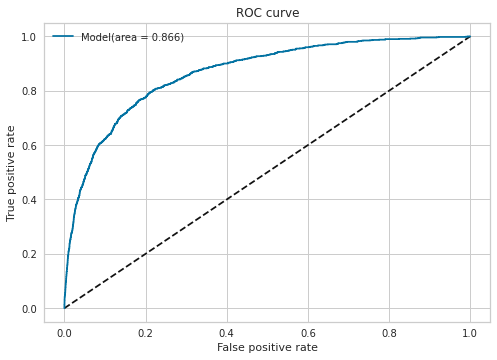

Fold 0 | AUC: 0.8661355719937422
Fold 0 | Avergae_precesion: 0.4002936145762436
Fold 0 | recall: 0.18843469591226322
Fold 0 | F1: 0.2876712328767123
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     13997
           1       0.61      0.19      0.29      1003

    accuracy                           0.94     15000
   macro avg       0.78      0.59      0.63     15000
weighted avg       0.92      0.94      0.92     15000

Confusion_matrix:
 [[13875   122]
 [  814   189]]
[LightGBM] [Warning] lambda_l1 is set=2.5825901359648176e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5825901359648176e-05
[LightGBM] [Warning] bagging_fraction is set=0.8225459856082522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8225459856082522
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7099515

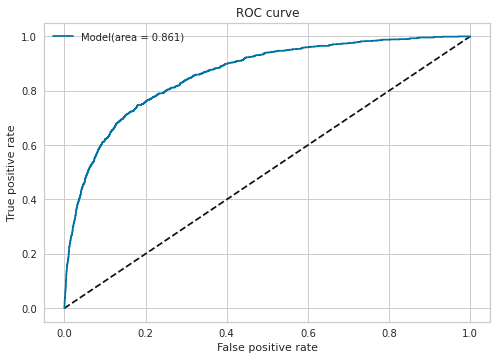

Fold 1 | AUC: 0.8608987640208616
Fold 1 | Avergae_precesion: 0.3831851052656008
Fold 1 | recall: 0.19242273180458624
Fold 1 | F1: 0.28805970149253735
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     13997
           1       0.57      0.19      0.29      1003

    accuracy                           0.94     15000
   macro avg       0.76      0.59      0.63     15000
weighted avg       0.92      0.94      0.92     15000

Confusion_matrix:
 [[13853   144]
 [  810   193]]
[LightGBM] [Warning] lambda_l1 is set=2.5825901359648176e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5825901359648176e-05
[LightGBM] [Warning] bagging_fraction is set=0.8225459856082522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8225459856082522
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.709951

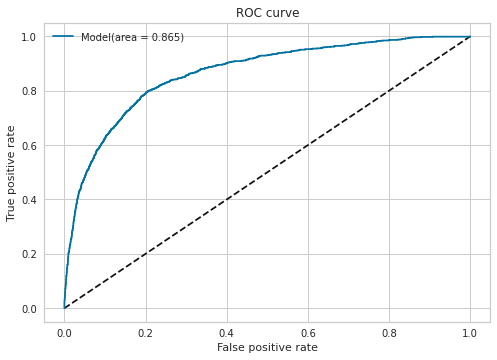

Fold 2 | AUC: 0.864747901042176
Fold 2 | Avergae_precesion: 0.39894283748611464
Fold 2 | recall: 0.2053838484546361
Fold 2 | F1: 0.3029411764705882
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     13997
           1       0.58      0.21      0.30      1003

    accuracy                           0.94     15000
   macro avg       0.76      0.60      0.63     15000
weighted avg       0.92      0.94      0.92     15000

Confusion_matrix:
 [[13846   151]
 [  797   206]]
[LightGBM] [Warning] lambda_l1 is set=2.5825901359648176e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5825901359648176e-05
[LightGBM] [Warning] bagging_fraction is set=0.8225459856082522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8225459856082522
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.70995154

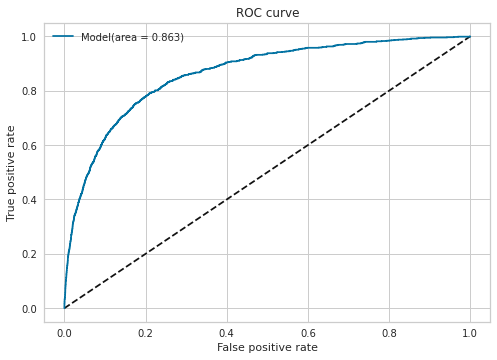

Fold 3 | AUC: 0.8634007956839634
Fold 3 | Avergae_precesion: 0.3936949195524541
Fold 3 | recall: 0.19940179461615154
Fold 3 | F1: 0.29739776951672864
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     13997
           1       0.58      0.20      0.30      1003

    accuracy                           0.94     15000
   macro avg       0.77      0.59      0.63     15000
weighted avg       0.92      0.94      0.92     15000

Confusion_matrix:
 [[13855   142]
 [  803   200]]
[LightGBM] [Warning] lambda_l1 is set=2.5825901359648176e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5825901359648176e-05
[LightGBM] [Warning] bagging_fraction is set=0.8225459856082522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8225459856082522
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.709951

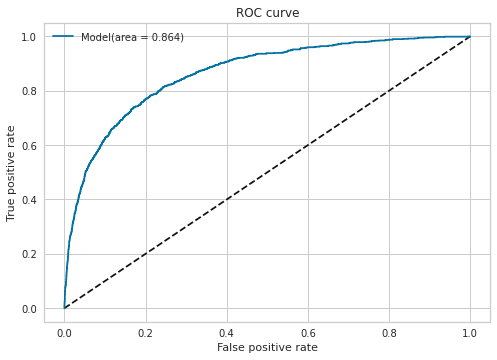

Fold 4 | AUC: 0.8644803248324612
Fold 4 | Avergae_precesion: 0.39853717751007056
Fold 4 | recall: 0.2073778664007976
Fold 4 | F1: 0.3083765752409192
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     13997
           1       0.60      0.21      0.31      1003

    accuracy                           0.94     15000
   macro avg       0.77      0.60      0.64     15000
weighted avg       0.92      0.94      0.92     15000

Confusion_matrix:
 [[13859   138]
 [  795   208]]
[LightGBM] [Warning] lambda_l1 is set=2.5825901359648176e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5825901359648176e-05
[LightGBM] [Warning] bagging_fraction is set=0.8225459856082522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8225459856082522
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7099515

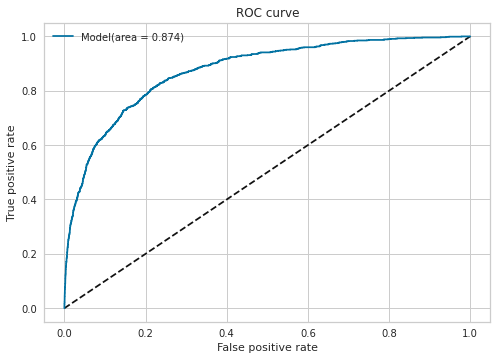

Fold 5 | AUC: 0.8739007668001211
Fold 5 | Avergae_precesion: 0.43916282497530695
Fold 5 | recall: 0.20837487537387836
Fold 5 | F1: 0.31859756097560976
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     13997
           1       0.68      0.21      0.32      1003

    accuracy                           0.94     15000
   macro avg       0.81      0.60      0.64     15000
weighted avg       0.93      0.94      0.93     15000

Confusion_matrix:
 [[13897   100]
 [  794   209]]
[LightGBM] [Warning] lambda_l1 is set=2.5825901359648176e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5825901359648176e-05
[LightGBM] [Warning] bagging_fraction is set=0.8225459856082522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8225459856082522
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.70995

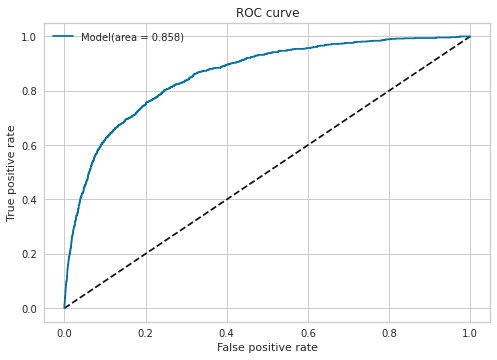

Fold 6 | AUC: 0.8580936783384224
Fold 6 | Avergae_precesion: 0.3630849846395366
Fold 6 | recall: 0.17265469061876249
Fold 6 | F1: 0.2629179331306991
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     13998
           1       0.55      0.17      0.26      1002

    accuracy                           0.94     15000
   macro avg       0.75      0.58      0.61     15000
weighted avg       0.92      0.94      0.92     15000

Confusion_matrix:
 [[13857   141]
 [  829   173]]
[LightGBM] [Warning] lambda_l1 is set=2.5825901359648176e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5825901359648176e-05
[LightGBM] [Warning] bagging_fraction is set=0.8225459856082522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8225459856082522
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7099515

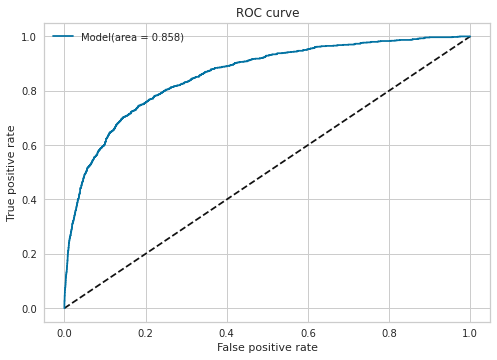

Fold 7 | AUC: 0.8579977136739522
Fold 7 | Avergae_precesion: 0.40655367087025357
Fold 7 | recall: 0.20758483033932135
Fold 7 | F1: 0.31067961165048547
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     13998
           1       0.62      0.21      0.31      1002

    accuracy                           0.94     15000
   macro avg       0.78      0.60      0.64     15000
weighted avg       0.92      0.94      0.92     15000

Confusion_matrix:
 [[13869   129]
 [  794   208]]
[LightGBM] [Warning] lambda_l1 is set=2.5825901359648176e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5825901359648176e-05
[LightGBM] [Warning] bagging_fraction is set=0.8225459856082522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8225459856082522
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.70995

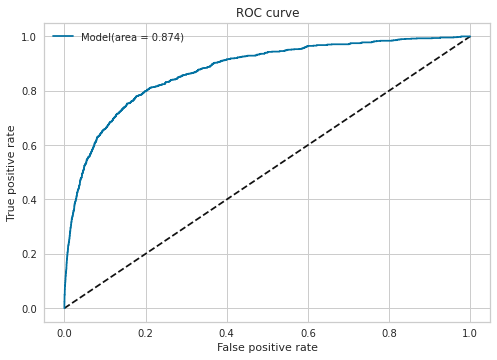

Fold 8 | AUC: 0.8742110007731358
Fold 8 | Avergae_precesion: 0.444278890676069
Fold 8 | recall: 0.2025948103792415
Fold 8 | F1: 0.3096872616323417
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     13998
           1       0.66      0.20      0.31      1002

    accuracy                           0.94     15000
   macro avg       0.80      0.60      0.64     15000
weighted avg       0.93      0.94      0.92     15000

Confusion_matrix:
 [[13892   106]
 [  799   203]]
[LightGBM] [Warning] lambda_l1 is set=2.5825901359648176e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5825901359648176e-05
[LightGBM] [Warning] bagging_fraction is set=0.8225459856082522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8225459856082522
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.709951547

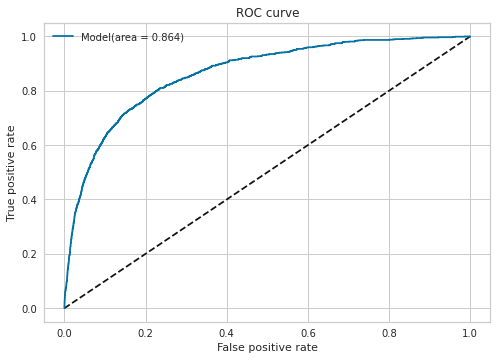

Fold 9 | AUC: 0.8641739952014816
Fold 9 | Avergae_precesion: 0.3773115678714637
Fold 9 | recall: 0.17065868263473055
Fold 9 | F1: 0.2585034013605442
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     13998
           1       0.53      0.17      0.26      1002

    accuracy                           0.93     15000
   macro avg       0.74      0.58      0.61     15000
weighted avg       0.92      0.93      0.92     15000

Confusion_matrix:
 [[13848   150]
 [  831   171]]
--------------------------------------------------------------------------------

Overall mean AUC score : 0.8648040512360318

Overall mean F1 score : 0.2944832224347166

Overall mean average precision score : 0.40050455934231144

Overall mean recall score : 0.1954888826534369
CPU times: user 44min 26s, sys: 15.1 s, total: 44min 41s
Wall time: 11min 52s


In [32]:
%%time 
# evaluate each strategy on the dataset
results = list()
# Setting a 10-fold stratified cross-validation (note: shuffle=True)
SEED = 42
FOLDS = 10
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
# CV interations
# Create arrays for the features and the response variable
roc_auc = list()
average_precision = list()
#X1=X.iloc[0:2000,:].copy()
#y1=y[0:2000].copy()
oof = np.empty((X.shape[0],))
#oof_bin = np.empty((X.shape[0],))
predictions=[]
mean_auc = 0
mean_ap=0
F1 = list()
Recall=list()
best_iteration = list()
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):    
    X_train, y_train = X.iloc[list(train_idx), :], y.iloc[list(train_idx)]
    X_test, y_test = X.iloc[list(test_idx), :],y.iloc[list(test_idx)]
    pipe1_model_lgbm_woe_powertransformer2.fit(X_train,y_train,
                                                  #classifier__verbose=False
                                                  #,verbose=False
                                                 )
    preds = pipe1_model_lgbm_woe_powertransformer2.predict_proba(X_test)[:,1]
    oof[test_idx] = preds
    auc_score= roc_auc_score(y_true=y_test, y_score=preds)
    roc_auc.append(auc_score)
    ap=average_precision_score(y_true=y_test, y_score=preds)
    plot_roc(y_test,preds)
    mean_auc += auc_score / FOLDS
    mean_ap+=ap/FOLDS
    predictions.append(pipe1_model_lgbm_woe_powertransformer2.predict_proba(X_test_final)[:,1]) 
    y_predicted = pipe1_model_lgbm_woe_powertransformer2.predict(X_test)
    recall = recall_score(y_test, y_predicted)
    f1= f1_score(y_test, y_predicted)
    print(f"Fold {fold} | AUC: {auc_score}")
    print(f"Fold {fold} | Avergae_precesion: {ap}")
    print(f"Fold {fold} | recall: {recall}")
    print(f"Fold {fold} | F1: {f1}")
    print('Classification report:\n',classification_report(y_test,y_predicted))
    print('Confusion_matrix:\n',confusion_matrix(y_test,y_predicted))
    roc_auc.append(auc_score)
    F1.append(f1)
    Recall.append(recall)
    #Mean of the predictions
print('-' * 80)  
print(f"\nOverall mean AUC score : {mean_auc}")
print(f"\nOverall mean F1 score : {np.mean(F1)}")
print(f"\nOverall mean average precision score : {mean_ap}")
print(f"\nOverall mean recall score : {np.mean(Recall)}")

**m1_hgbc:**  

        CV : 'auc' :0.8654007907881465
             'average_precision_score' :0.402
             'f1_score' : 0.2805834930186596



---------------------------------------------

**m2_catboost:**

       CV : 'auc' : 0.8662925048383615
             'average_precision_score' : 0.4007558117925276
             'f1_score' : 0.28917295975957824
      
      
-----------------------------------------------

**m3_xgbr:**  

      CV : 'auc' :0.855
             'average_precision_score' :0.372
             'f1_score' : 0.294
      
----------------------------------------------

**m4_LR**

            CV : 'auc' :0.862
                 'average_precision_score' :0.381
                 'f1_score' : 0.259
      


-----------------------------------------------
**m5_svm**   

           CV : 'auc' :
                 'average_precision_score' :!
                 'f1_score' : !
      
-----------------------------------------------
**m6_RF**    

        CV : 'auc' :0.863
             'average_precision_score' :0.396
             'f1_score' : 0.276
      
---------------------------------------------------
**m7_Lgbm**

          CV : 'auc' :0.8649
             'average_precision_score' :0.400
             'f1_score' :0.291
  ---------------------------------------------------
**m8_Lgbm2**

          CV : 'auc' :0.8648
             'average_precision_score' :0.400
             'f1_score' :0.294     
             
             
             
**Final Results :**             

In [33]:
data_results={'model':['m1_hgbc','m2_catboost',
               'm3_xgbr','m4_LR',
               'm5_RF','m6_lgbm1',
              'm7_lgbm2'],
'auc' :[ 0.865434044881213,0.8662925048383615, 
        0.8552429800216585,0.8620132487013733,
        0.8638723261807801,0.8649350128689158,
       0.8648040512360318],

'f1_score' : [0.27931324050967715,0.28917295975957824,
              0.2944488401724624,0.25948063132387106,
              0.2767006882442805,0.2925125077182382,
             0.2944832224347166],

'average_precision_score' :[0.4032613815557755,0.4007558117925276,
                            0.3727962618723695,0.3818703865043032,
                            0.3960003199342976,0.40000554322071746,
                           0.40050455934231144]    
     }

df_results= pd.DataFrame.from_dict(data=data_results
                         #,columns=['model','auc','f1_score', 'average_precision_score']
                       )
# Highlight the Min values in each column
print("\nModified Stlying DataFrame:")
df_results.style.highlight_min(axis=0)


Modified Stlying DataFrame:


,model,auc,f1_score,average_precision_score
0,m1_hgbc,0.865434,0.279313,0.403261
1,m2_catboost,0.866293,0.289173,0.400756
2,m3_xgbr,0.855243,0.294449,0.372796
3,m4_LR,0.862013,0.259481,0.381870
4,m5_RF,0.863872,0.276701,0.396000
5,m6_lgbm1,0.864935,0.292513,0.400006
6,m7_lgbm2,0.864804,0.294483,0.400505


In [34]:
df_results.style.highlight_max(axis=0)

,model,auc,f1_score,average_precision_score
0,m1_hgbc,0.865434,0.279313,0.403261
1,m2_catboost,0.866293,0.289173,0.400756
2,m3_xgbr,0.855243,0.294449,0.372796
3,m4_LR,0.862013,0.259481,0.381870
4,m5_RF,0.863872,0.276701,0.396000
5,m6_lgbm1,0.864935,0.292513,0.400006
6,m7_lgbm2,0.864804,0.294483,0.400505


In [35]:
cm = sns.light_palette("blue", as_cmap=True)

df_results.sort_values(by='auc',ascending=False).style.background_gradient(cmap=cm).highlight_max(axis=0, color='red')

,model,auc,f1_score,average_precision_score
1,m2_catboost,0.866293,0.289173,0.400756
0,m1_hgbc,0.865434,0.279313,0.403261
5,m6_lgbm1,0.864935,0.292513,0.400006
6,m7_lgbm2,0.864804,0.294483,0.400505
4,m5_RF,0.863872,0.276701,0.396000
3,m4_LR,0.862013,0.259481,0.381870
2,m3_xgbr,0.855243,0.294449,0.372796


In [36]:
df_results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap=cm).highlight_max(axis=0, color='red')

,model,auc,f1_score,average_precision_score
6,m7_lgbm2,0.864804,0.294483,0.400505
2,m3_xgbr,0.855243,0.294449,0.372796
5,m6_lgbm1,0.864935,0.292513,0.400006
1,m2_catboost,0.866293,0.289173,0.400756
0,m1_hgbc,0.865434,0.279313,0.403261
4,m5_RF,0.863872,0.276701,0.396000
3,m4_LR,0.862013,0.259481,0.381870


In [37]:
df_results.sort_values(by='average_precision_score',ascending=False).style.background_gradient(cmap=cm)

,model,auc,f1_score,average_precision_score
0,m1_hgbc,0.865434,0.279313,0.403261
1,m2_catboost,0.866293,0.289173,0.400756
6,m7_lgbm2,0.864804,0.294483,0.400505
5,m6_lgbm1,0.864935,0.292513,0.400006
4,m5_RF,0.863872,0.276701,0.396000
3,m4_LR,0.862013,0.259481,0.381870
2,m3_xgbr,0.855243,0.294449,0.372796


In [38]:
#pipe_lgbm_woe_powertransformer.fit(X,y)
#predictions =pipe_lgbm_woe_powertransformer.predict_proba(X_test_final)[:,1]

In [39]:
predictions = np.mean(np.column_stack(predictions), axis=1)

In [40]:
# Save the predictions to a CSV file
sub = pd.read_csv('../input/GiveMeSomeCredit/sampleEntry.csv')
sub['Probability']=predictions
sub.to_csv('pipe_lgbm_woe_powertransformer_estimator_XGB_CV_onlynum_fe_V3.csv', index=False)
sub

,Id,Probability
0,1,0.049593
1,2,0.034282
2,3,0.014106
3,4,0.057494
4,5,0.117421
...,...,...
101498,101499,0.031084
101499,101500,0.381699
101500,101501,0.006950
101501,101502,0.065035


# Conclusion: 

1. A model that meets the requirements and constraints of project stakeholders.
1. A model that is sufficiently skillful given the time and resources available.
1. A model that is skillful as compared to naive models.
1. A model that is skillful relative to other tested models.
1. A model that is skillful relative to the state-of-the-art.